##  

In [10]:
%matplotlib inline

# matplot.pyplotの場合

---

グラフ描画ライブラリmatplotは高速に描画できますが
あまりグラフがきれいで無く、表の種類にも限りがあります。

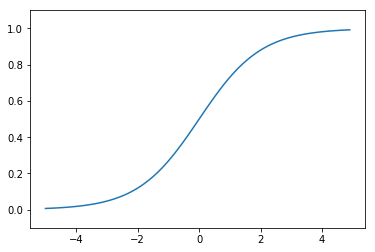

In [11]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


# Highchartsの場合

---

もともとはjavascript用のライブラリですが、画像描画速度が早く、きれいなグラフを生成できます。
ライブラリのインストールについては

> pip install highcharts 

でインストール出来ます。

pandasを利用する場合は

> pip install pandas-highcharts

でデータ・セットの可視化が可能です。`

In [12]:
from highcharts import Highchart

H = Highchart(width=450, height=450)
H.set_options('title', {'text': 'メインタイトル'})
H.set_options('subtitle', {'text': 'サブタイトル'})
H.set_options('xAxis', {'title': {'text': 'X軸'}})
H.set_options('yAxis', {'title': {'text': 'Y軸'}, 'lineWidth': 2})
H.add_data_set([1, 2, 3])
# オプションの指定
# H.add_data_set([1, 2, 3], dashStyle='ShortDash', color='plum', lineWidth=6)
H

# グラフの種類

---

highcharts.Highchart.add_data_set()の第二引数にグラフの種類を指定します。各位置パラメータの指定は下記のとおりです。

|位置パラメータ|オブジェクト|型|
|:-----------:|:------------:|:------------:|
|1|データセット|リスト、タプル|
|2|グラフの種類|文字列|
|3|名前|文字列|

下記の例では1番目の要素をdata1という名前の面グラフ、2番めの要素をdata2という名前の棒グラフを出力しています。

In [13]:
H = Highchart(width=450, height=450)
H.add_data_set([1, 2, 3], 'area', 'data1')
H.add_data_set([4, 5, 6], 'bar', 'data2')
H

# ドリルダウン

---

グラフの要素をクリックすると、更に別なグラフが表示されます。

highcharts.Highchart.add_data_set()の各要素に辞書型のデータを渡します。

辞書のキーにdrilldown、値にドリルダウンに対応する名前を設定します。

ドリルダウン後の要素の指定はhighcharts.Highchart.add_drilldown_data_set()に前述した位置パラメータの3つの引数を指定します。

3つ目の名前と上位の要素を対応させます。

日本語を使う場合はunicode指定してください。

In [23]:
H = Highchart()
data = [{
    'y': 100,
    'drilldown': u'事業本部'
}, {
    'y': 2,
    'drilldown': 'b'
}, {
    'y': 3,
    'drilldown': 'c'
}]
H.add_data_set(data, 'column')
H.add_drilldown_data_set([0.3, 0.4, 0.5], 'pie', u'事業本部')
H.add_drilldown_data_set([4, 5, 6], 'line', 'b')
H.add_drilldown_data_set([7, 8, 9], 'area', 'c')
H

# pandas_highchartの利用

---

pandas_highcharts.display.display_chartsにpandas.DataFrame.plot()と同じ引数を渡すだけでグラフを出力することができます。

In [15]:
import pandas as pd
from pandas_highcharts.display import display_charts

df = pd.DataFrame([1, 2, 3], index=[list('abc')])
display_charts(df, figsize=(450, 450))

In [16]:
dates = pd.date_range("20170501", periods=6)
df2 = pd.DataFrame(np.random.randn(6,4),index = dates, columns = list("ABCD"))
display_charts(df2, figsize=(450, 450))